In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("data/456_complete_data.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'word1', 'word2', 'human', 'gpt_left', 'gpt_right', 'gpt',
       'wup_common', 'wup_average', 'lin_common', 'lin_average'],
      dtype='object')

In [4]:
# scaler = MinMaxScaler()
# data['human_standardized'] = scaler.fit_transform(data[['human']])

# scaler = MinMaxScaler()
# data['gpt_standardized'] = scaler.fit_transform(data[['gpt']])

# Human

R-squared:

lin_common:  0.08324097421003307

lin_average: 0.057633614624807206

wup_common: 0.06049677012496468

wup_average: 0.03855075703388511

Lin(information content), Common 略高一点

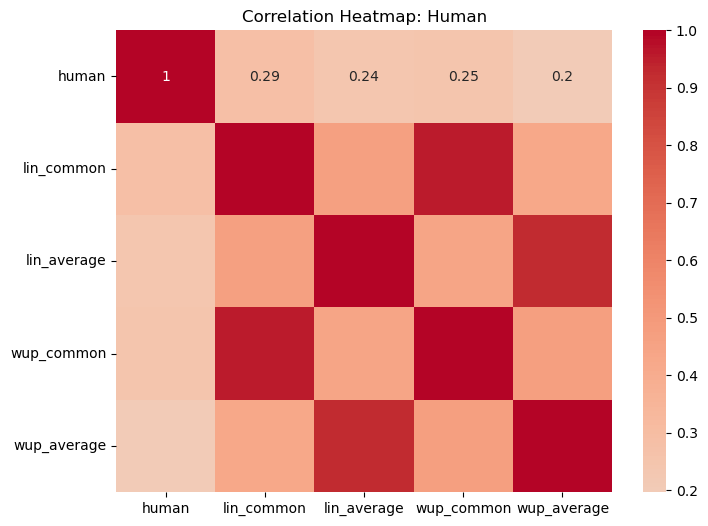

In [9]:
# Calculate the correlation matrix
corr_matrix = data[['human','lin_common', 'lin_average', 'wup_common','wup_average']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Human')
plt.show()

In [16]:
x_value = 'human'
y_value = 'wup_common'

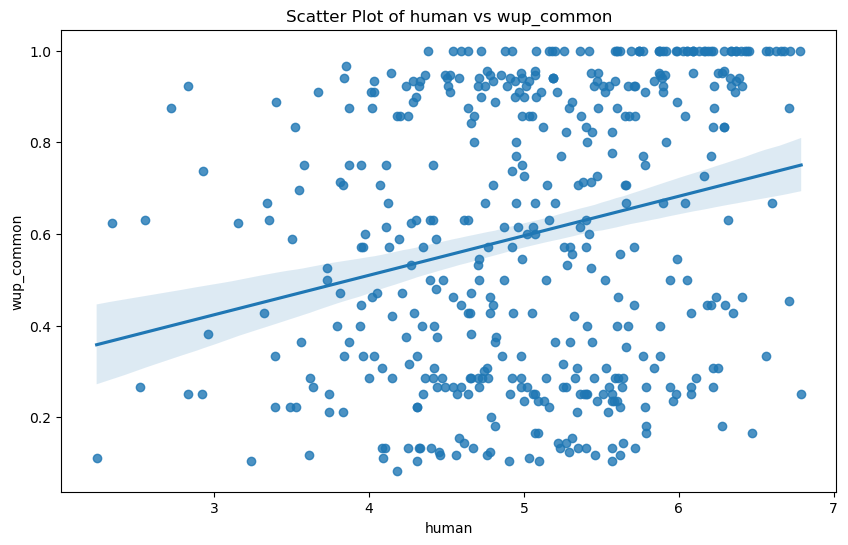

Correlation Coefficient: 0.2459609117826747
R-squared: 0.06049677012496468


In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x= x_value, y= y_value, data=data)
plt.title(f'Scatter Plot of {x_value} vs {y_value}')
plt.xlabel(x_value)
plt.ylabel(y_value)
plt.show()


correlation_coefficient = data[[x_value, y_value]].corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

X = data[[x_value]]
y = data[y_value]
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

# GPT

R-squared:

lin_common:  0.08604963652989317

lin_average: 0.1010126355145049

wup_common: 0.0731191888449012

wup_average: 0.08775957748234464


Lin(information content) 略高， average略高

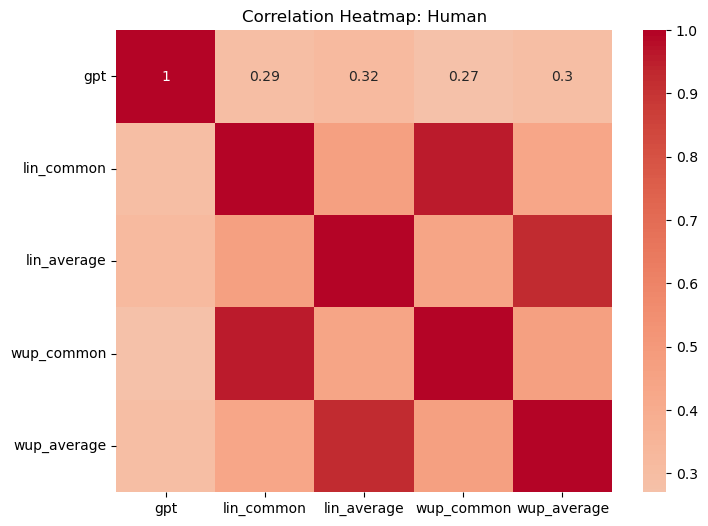

In [ ]:
# Calculate the correlation matrix
corr_matrix = data[['gpt','lin_common', 'lin_average', 'wup_common','wup_average']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Human')
plt.show()

In [24]:
x_value = 'gpt'
y_value = 'wup_average'

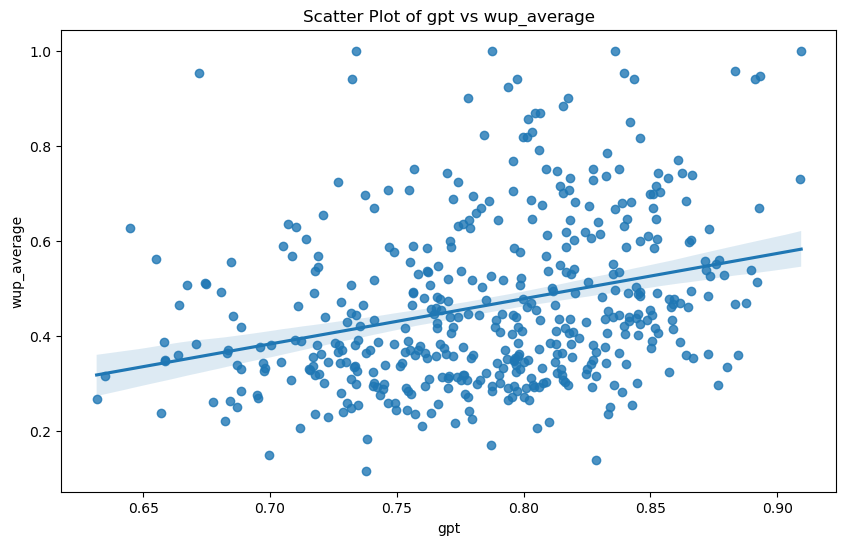

Correlation Coefficient: 0.29624243025323793
R-squared: 0.08775957748234464


In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x= x_value, y= y_value, data=data)
plt.title(f'Scatter Plot of {x_value} vs {y_value}')
plt.xlabel(x_value)
plt.ylabel(y_value)
plt.show()


correlation_coefficient = data[[x_value, y_value]].corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

X = data[[x_value]]
y = data[y_value]
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

In [35]:
X = data[['lin_common', 'lin_average']]
y = data['human']

model = LinearRegression().fit(X, y)

print("Coefficients:", model.coef_)

Coefficients: [0.5136719  0.58470042]


In [36]:
X = data[['lin_common', 'lin_average']]
y = data['gpt']
model = LinearRegression().fit(X, y)

print("Coefficients:", model.coef_)

Coefficients: [0.02659931 0.06293308]


C:\Users\xxt\AppData\Local\Temp\ipykernel_77700\3240821541.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_corr = data.groupby('human_segment').apply(lambda x: x['human'].corr(x['lin_common']))


human_segment
Low       0.054649
Medium   -0.020953
High      0.245542
dtype: float64


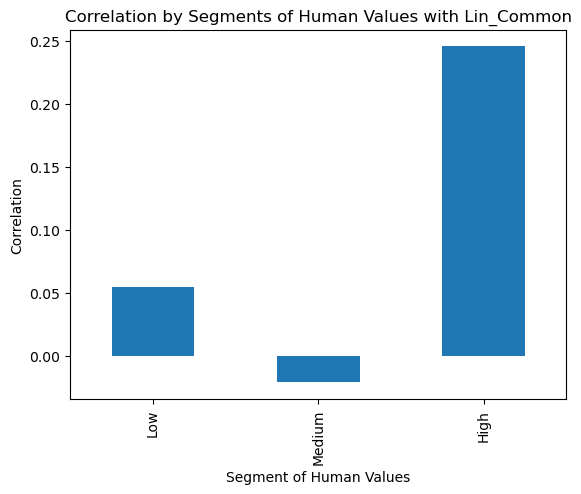

In [46]:
data['human_segment'] = pd.qcut(data['human'], q=3, labels=["Low", "Medium", "High"])

segmented_corr = data.groupby('human_segment').apply(lambda x: x['human'].corr(x['lin_common']))

print(segmented_corr)

segmented_corr.plot(kind='bar')
plt.title('Correlation by Segments of Human Values with Lin_Common')
plt.ylabel('Correlation')
plt.xlabel('Segment of Human Values')
plt.show()


C:\Users\xxt\AppData\Local\Temp\ipykernel_77700\123352570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_corr = data.groupby('human_segment').apply(lambda x: x['human'].corr(x['lin_average']))


human_segment
Low       0.208350
Medium    0.020373
High      0.300260
dtype: float64


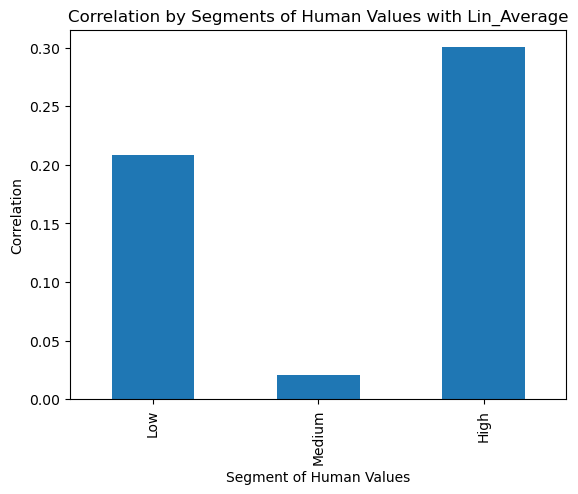

In [45]:
segmented_corr = data.groupby('human_segment').apply(lambda x: x['human'].corr(x['lin_average']))

print(segmented_corr)

segmented_corr.plot(kind='bar')
plt.title('Correlation by Segments of Human Values with Lin_Average')
plt.ylabel('Correlation')
plt.xlabel('Segment of Human Values')
plt.show()

C:\Users\xxt\AppData\Local\Temp\ipykernel_77700\1485198666.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_corr = data.groupby('gpt_segment').apply(lambda x: x['gpt'].corr(x['lin_common']))


gpt_segment
Low      -0.079908
Medium    0.090255
High      0.206294
dtype: float64


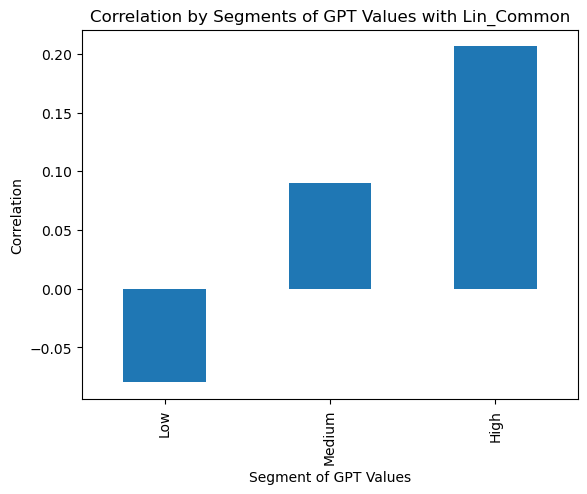

In [47]:
data['gpt_segment'] = pd.qcut(data['gpt'], q=3, labels=["Low", "Medium", "High"])

segmented_corr = data.groupby('gpt_segment').apply(lambda x: x['gpt'].corr(x['lin_common']))

print(segmented_corr)

segmented_corr.plot(kind='bar')
plt.title('Correlation by Segments of GPT Values with Lin_Common')
plt.ylabel('Correlation')
plt.xlabel('Segment of GPT Values')
plt.show()


C:\Users\xxt\AppData\Local\Temp\ipykernel_77700\1274341583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_corr = data.groupby('gpt_segment').apply(lambda x: x['gpt'].corr(x['lin_average']))


gpt_segment
Low       0.046867
Medium    0.097576
High      0.239482
dtype: float64


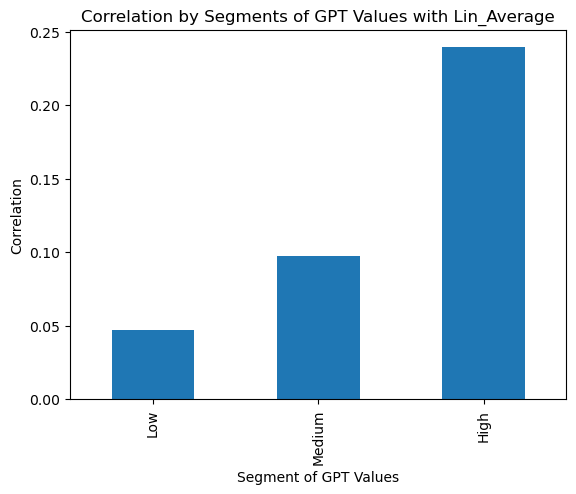

In [49]:
segmented_corr = data.groupby('gpt_segment').apply(lambda x: x['gpt'].corr(x['lin_average']))

print(segmented_corr)

segmented_corr.plot(kind='bar')
plt.title('Correlation by Segments of GPT Values with Lin_Average')
plt.ylabel('Correlation')
plt.xlabel('Segment of GPT Values')
plt.show()
